In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import joblib


In [5]:
df = pd.read_csv("obese.csv")
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

In [8]:
target_col = "Disease"
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Samples: {df.shape[0]}, Numeric features: {len(numeric_cols)}, Categorical features: {len(categorical_cols)}")

Samples: 159, Numeric features: 1464, Categorical features: 2


In [9]:
le = LabelEncoder()
y = le.fit_transform(df[target_col])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("label mapping: ", label_mapping)

label mapping:  {'Healthy': 0, 'RRMS': 1}


In [11]:
X = df.drop(columns=[target_col])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size: ",X_train.shape, "Test size: ", X_test.shape)

Train size:  (127, 1466) Test size:  (32, 1466)


In [13]:
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
], remainder="drop")

In [14]:
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
print("Processed train shape:", X_train_proc.shape)
print("Processed test shape :", X_test_proc.shape)

Processed train shape: (127, 1471)
Processed test shape : (32, 1471)


In [15]:
pca = PCA(n_components=0.95, svd_solver='full', random_state=42)
X_train_pca = pca.fit_transform(X_train_proc)
X_test_pca = pca.transform(X_test_proc)
print("PCA reduced train shape:", X_train_pca.shape)
print("PCA reduced test shape :", X_test_pca.shape)
print("Explained variance ratio (total):", np.sum(pca.explained_variance_ratio_))

PCA reduced train shape: (127, 101)
PCA reduced test shape : (32, 101)
Explained variance ratio (total): 0.9510073955147664


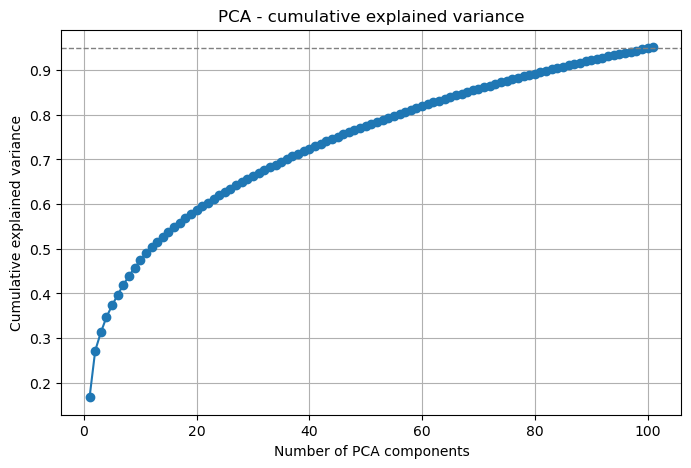

In [16]:
cumvar = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(cumvar)+1), cumvar, marker='o')
plt.xlabel("Number of PCA components")
plt.ylabel("Cumulative explained variance")
plt.grid(True)
plt.title("PCA - cumulative explained variance")
plt.axhline(0.95, color='gray', linestyle='--', linewidth=1)
plt.show()

In [17]:
joblib.dump(preprocessor, "preprocessor.joblib")
joblib.dump(pca, "pca.joblib")
joblib.dump(le, "label_encoder.joblib")

print("Saved: preprocessor.joblib, pca.joblib, label_encoder.joblib")

Saved: preprocessor.joblib, pca.joblib, label_encoder.joblib


In [18]:
!jupyter nbconvert --to script processing_PCA.ipynb

[NbConvertApp] Converting notebook processing_PCA.ipynb to script
[NbConvertApp] Writing 2885 bytes to processing_PCA.py
